### 0. 패키지 Import

In [60]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
rc("font", family = font_manager.FontProperties(fname="C:/Windows/Fonts/KoPubWorld Dotum_Pro Medium.otf").get_name())

get_ipython().run_line_magic('matplotlib', 'inline')

### 1. 변경사항

#### (1) compnany1.csv → company2.csv
- 기업구분에 따라 라벨을 부여했습니다. (대기업: 1, 중견기업: 2, 중소기업: 3, 기타: 4)
- 설립일(업력), 입사율, 퇴사율의 숫자 부분만 정리했습니다. (업력, 입사율(%), 퇴사율(%))
- 퇴사율/입사율 * 100 (.2f 반올림)으로 이직율을 계산했습니다. (이직율 (%))
- 정리되기 전 column을 제거하고, 열 순서를 정리했습니다.

In [61]:
df = pd.read_csv('company2.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,기업명,기업구분,기업구분코드,사원수,업력,입사율(%),퇴사율(%),이직율(%),별점,지역,홈페이지
0,(주)페이타랩,중소기업,3.0,52,4.0,114.71,64.71,56.41,4.3,부산 부산진구,passorder.co.kr
1,(주)엠제이플렉스,중소기업,3.0,930,17.0,89.94,97.84,108.78,2.3,서울 구로구,www.mjplex.co.kr
2,(주)앰진,중소기업,3.0,20,10.0,40.00,30.00,75.00,3.0,서울 송파구,www.amgine.co.kr
3,(주)도킹블록,중소기업,3.0,11,3.0,120.00,100.00,83.33,0.0,서울 강남구,dockingblock.com
4,(주)헥토이노베이션,중소기업,3.0,140,0.0,120.00,100.00,83.33,3.3,서울 강남구,https://www.hectoinnovation.co.kr/


#### (2) company2.csv → company3.csv
- 지역, 홈페이지 column을 제거했습니다.
- 입력된 별점 기준에 따라 추천:1, 비추천:0으로 구분했습니다. 
    - Default 기준 = 2.7 (median 2.69...에서 반올림)
- 추천 결측치 (별점 0 항목)을 제거했습니다.

In [90]:
df = pd.read_csv('company3.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)

df.head()

,기업명,기업구분,기업구분코드,사원수,업력,입사율(%),퇴사율(%),이직율(%),별점,추천
0,(주)페이타랩,중소기업,3.0,52,4.0,114.71,64.71,56.41,4.3,1.0
1,(주)엠제이플렉스,중소기업,3.0,930,17.0,89.94,97.84,108.78,2.3,0.0
2,(주)앰진,중소기업,3.0,20,10.0,40.00,30.00,75.00,3.0,1.0
3,(주)헥토이노베이션,중소기업,3.0,140,0.0,120.00,100.00,83.33,3.3,1.0
4,(주)세종분석연구원,중소기업,3.0,3,6.0,33.33,0.00,0.00,3.0,1.0


### 2. 변경내역 코드

#### (1) company1.csv → company2.csv

In [101]:
df = pd.read_csv('company1.csv', encoding='utf-8')
df.head(2)

,Unnamed: 0,기업명,기업구분2,기업구분,사원수2,사원수,설립일(업력),홈페이지,지역,별점,입사율,퇴사율
0,0,(주)페이타랩,중소기업,"중소기업, 스타트업, 주식회사, 병역특례..",52,52 명 (2022년 기준),2018년 2월 28일 (업력 4년),passorder.co.kr,부산 부산진구,4.3,114.71 % (39 명),64.71 % (22 명)
1,1,(주)엠제이플렉스,중소기업,"중소기업, 스타트업, 외부감사법인, 주식..",930,930 명 (2022년 기준),2005년 3월 24일 (업력 17년),www.mjplex.co.kr,서울 구로구,2.3,89.94 % (876 명),97.84 % (953 명)


In [95]:
df.columns

Index(['Unnamed: 0', '기업명', '기업구분2', '기업구분', '사원수2', '사원수', '설립일(업력)', '홈페이지',
       '지역', '별점', '입사율', '퇴사율'],
      dtype='object')

In [102]:
for idx, corp in enumerate(df['기업구분2']):
    if corp == '중소기업':
        df.loc[idx, '기업구분코드'] = 3
    elif corp == '중견기업':
        df.loc[idx, '기업구분코드'] = 2
    elif corp == '대기업':
        df.loc[idx, '기업구분코드'] = 1
    else:
        df.loc[idx, '기업구분코드'] = 4

In [103]:
for i, r in df.iterrows():
    try:
        df.loc[i, '업력'] = float(r['설립일(업력)'].split()[-1][:-2])
    except:
        df.loc[i, '업력'] = 0
    try:
        df.loc[i, '입사율(%)'] = float(r['입사율'].split()[0])
        df.loc[i, '퇴사율(%)'] = float(r['퇴사율'].split()[0])
    except:
        df.loc[i, '입사율(%)'] = np.nan
        df.loc[i, '퇴사율(%)'] = np.nan

for i, r in df.iterrows():
    try:
        df.loc[i, '이직율(%)'] = float(round(r['퇴사율(%)'] / r['입사율(%)'] * 100, 2))
    except:
        df.loc[i, '이직율(%)'] = np.nan

df.head(2)

,Unnamed: 0,기업명,기업구분2,기업구분,사원수2,사원수,설립일(업력),홈페이지,지역,별점,입사율,퇴사율,기업구분코드,업력,입사율(%),퇴사율(%),이직율(%)
0,0,(주)페이타랩,중소기업,"중소기업, 스타트업, 주식회사, 병역특례..",52,52 명 (2022년 기준),2018년 2월 28일 (업력 4년),passorder.co.kr,부산 부산진구,4.3,114.71 % (39 명),64.71 % (22 명),3.0,4.0,114.71,64.71,56.41
1,1,(주)엠제이플렉스,중소기업,"중소기업, 스타트업, 외부감사법인, 주식..",930,930 명 (2022년 기준),2005년 3월 24일 (업력 17년),www.mjplex.co.kr,서울 구로구,2.3,89.94 % (876 명),97.84 % (953 명),3.0,17.0,89.94,97.84,108.78


In [104]:
df.columns

Index(['Unnamed: 0', '기업명', '기업구분2', '기업구분', '사원수2', '사원수', '설립일(업력)', '홈페이지',
       '지역', '별점', '입사율', '퇴사율', '기업구분코드', '업력', '입사율(%)', '퇴사율(%)', '이직율(%)'],
      dtype='object')

In [105]:
df.drop(['Unnamed: 0', '기업구분', '설립일(업력)', '입사율', '퇴사율', '사원수'], axis=1, inplace=True)
df.rename(columns={'기업구분2':'기업구분', '사원수2':'사원수'}, inplace=True)
df.head()

,기업명,기업구분,사원수,홈페이지,지역,별점,기업구분코드,업력,입사율(%),퇴사율(%),이직율(%)
0,(주)페이타랩,중소기업,52,passorder.co.kr,부산 부산진구,4.3,3.0,4.0,114.71,64.71,56.41
1,(주)엠제이플렉스,중소기업,930,www.mjplex.co.kr,서울 구로구,2.3,3.0,17.0,89.94,97.84,108.78
2,(주)앰진,중소기업,20,www.amgine.co.kr,서울 송파구,3.0,3.0,10.0,40.00,30.00,75.00
3,(주)도킹블록,중소기업,11,dockingblock.com,서울 강남구,0.0,3.0,3.0,120.00,100.00,83.33
4,(주)헥토이노베이션,중소기업,140,https://www.hectoinnovation.co.kr/,서울 강남구,3.3,3.0,0.0,120.00,100.00,83.33


In [106]:
df = df[['기업명', '기업구분', '기업구분코드', '사원수', '업력', '입사율(%)', '퇴사율(%)', '이직율(%)', '별점', '지역', '홈페이지']]
df.head()

,기업명,기업구분,기업구분코드,사원수,업력,입사율(%),퇴사율(%),이직율(%),별점,지역,홈페이지
0,(주)페이타랩,중소기업,3.0,52,4.0,114.71,64.71,56.41,4.3,부산 부산진구,passorder.co.kr
1,(주)엠제이플렉스,중소기업,3.0,930,17.0,89.94,97.84,108.78,2.3,서울 구로구,www.mjplex.co.kr
2,(주)앰진,중소기업,3.0,20,10.0,40.00,30.00,75.00,3.0,서울 송파구,www.amgine.co.kr
3,(주)도킹블록,중소기업,3.0,11,3.0,120.00,100.00,83.33,0.0,서울 강남구,dockingblock.com
4,(주)헥토이노베이션,중소기업,3.0,140,0.0,120.00,100.00,83.33,3.3,서울 강남구,https://www.hectoinnovation.co.kr/


In [ ]:
df.to_csv('company2.csv', encoding='utf-8')

#### (2) company2.csv → comany3.csv

In [107]:
df = pd.read_csv('company2.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,기업명,기업구분,기업구분코드,사원수,업력,입사율(%),퇴사율(%),이직율(%),별점,지역,홈페이지
0,(주)페이타랩,중소기업,3.0,52,4.0,114.71,64.71,56.41,4.3,부산 부산진구,passorder.co.kr
1,(주)엠제이플렉스,중소기업,3.0,930,17.0,89.94,97.84,108.78,2.3,서울 구로구,www.mjplex.co.kr
2,(주)앰진,중소기업,3.0,20,10.0,40.00,30.00,75.00,3.0,서울 송파구,www.amgine.co.kr
3,(주)도킹블록,중소기업,3.0,11,3.0,120.00,100.00,83.33,0.0,서울 강남구,dockingblock.com
4,(주)헥토이노베이션,중소기업,3.0,140,0.0,120.00,100.00,83.33,3.3,서울 강남구,https://www.hectoinnovation.co.kr/


In [108]:
# 지역, 홈페이지 column 제거
df_md = df.drop(['지역', '홈페이지'], axis=1)
df_md.head()

,기업명,기업구분,기업구분코드,사원수,업력,입사율(%),퇴사율(%),이직율(%),별점
0,(주)페이타랩,중소기업,3.0,52,4.0,114.71,64.71,56.41,4.3
1,(주)엠제이플렉스,중소기업,3.0,930,17.0,89.94,97.84,108.78,2.3
2,(주)앰진,중소기업,3.0,20,10.0,40.00,30.00,75.00,3.0
3,(주)도킹블록,중소기업,3.0,11,3.0,120.00,100.00,83.33,0.0
4,(주)헥토이노베이션,중소기업,3.0,140,0.0,120.00,100.00,83.33,3.3


In [109]:
df_md['별점'].describe()

count    185.000000
mean       2.697838
std        0.901506
min        0.000000
25%        2.400000
50%        2.700000
75%        3.200000
max        5.000000
Name: 별점, dtype: float64

In [110]:
# 별점 → 추천 Labeling 함수

def star_to_rec(score=2.7):
    for i, r in df_md.iterrows():
        star = r['별점'] 
        if star != 0:
            if star >= score:
                df_md.loc[i, '추천'] = 1 
            else: 
                df_md.loc[i,'추천'] = 0

star_to_rec()
df_md.head()

,기업명,기업구분,기업구분코드,사원수,업력,입사율(%),퇴사율(%),이직율(%),별점,추천
0,(주)페이타랩,중소기업,3.0,52,4.0,114.71,64.71,56.41,4.3,1.0
1,(주)엠제이플렉스,중소기업,3.0,930,17.0,89.94,97.84,108.78,2.3,0.0
2,(주)앰진,중소기업,3.0,20,10.0,40.00,30.00,75.00,3.0,1.0
3,(주)도킹블록,중소기업,3.0,11,3.0,120.00,100.00,83.33,0.0,NaN
4,(주)헥토이노베이션,중소기업,3.0,140,0.0,120.00,100.00,83.33,3.3,1.0


In [88]:
df_md.dropna(inplace=True)
df_md.head()

,기업명,기업구분,기업구분코드,사원수,업력,입사율(%),퇴사율(%),이직율(%),별점,추천
0,(주)페이타랩,중소기업,3.0,52,4.0,114.71,64.71,56.41,4.3,1.0
1,(주)엠제이플렉스,중소기업,3.0,930,17.0,89.94,97.84,108.78,2.3,0.0
2,(주)앰진,중소기업,3.0,20,10.0,40.00,30.00,75.00,3.0,1.0
4,(주)헥토이노베이션,중소기업,3.0,140,0.0,120.00,100.00,83.33,3.3,1.0
5,(주)세종분석연구원,중소기업,3.0,3,6.0,33.33,0.00,0.00,3.0,1.0


In [89]:
df_md.to_csv('company3.csv', encoding='utf-8')

### 3. 추가 EDA - 추천 column 관련 데이터 탐색

- 대기업의 평균 별점과 추천율이 높음 확인
- 업력, 사원수, 이직율 등 연속형 변수는 구간을 만들어야 원활한 확인이 가능해 보임

In [114]:
# 각 column 별 추천 정도 평균 - groupby()
 
for col in df_md.columns[1:-2]:
    print(df_md[[col, '별점', '추천']].groupby([col]).mean().round(3))

         별점     추천
기업구분              
기타    2.656  0.500
대기업   2.850  0.727
중견기업  2.667  0.609
중소기업  2.695  0.565
           별점     추천
기업구분코드              
1.0     2.850  0.727
2.0     2.667  0.609
3.0     2.695  0.565
4.0     2.656  0.500
         별점   추천
사원수             
2     2.800  1.0
3     1.833  0.5
7     2.500  0.0
9     0.000  NaN
10    0.000  NaN
...     ...  ...
1686  3.700  1.0
1885  2.400  0.0
5376  4.000  1.0
6603  3.100  1.0
9658  2.600  0.0

[126 rows x 2 columns]
         별점     추천
업력                
0.0   2.858  0.640
1.0   1.267  1.000
2.0   3.350  0.500
3.0   0.760  0.000
4.0   3.092  0.692
5.0   3.600  1.000
6.0   2.836  0.545
7.0   2.889  0.750
8.0   2.975  0.500
9.0   2.622  0.556
10.0  3.083  0.667
11.0  4.100  1.000
12.0  2.300  0.200
13.0  2.320  0.500
14.0  2.522  0.556
15.0  2.433  0.333
16.0  2.767  0.333
17.0  2.675  0.500
18.0  2.425  0.250
19.0  2.540  0.400
20.0  2.625  0.375
21.0  2.967  0.667
22.0  2.800  0.667
23.0  2.667  0.667
24.0  1.850  0.000
25

- 상관계수 변화
    - 사원수/업력 = 0.32 (연속형 변수로 변환해 상관계수 추가됨)
    - 퇴사율/이직율 = 0.15
    - 별점/추천 = 0.74 (별점 → 추천으로 만들어 그런듯 함)

C:\Users\kjaeh\AppData\Local\Temp\ipykernel_14324\3036386937.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_md.corr(), annot=True, fmt = '.2f', lw=0.2, cmap='YlGnBu')


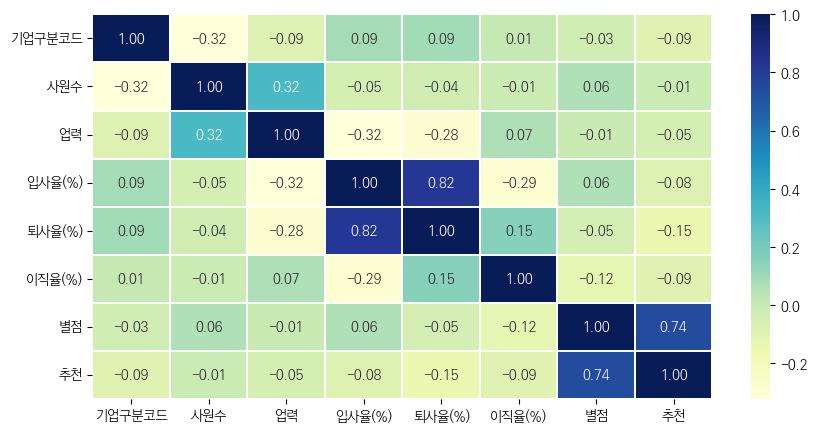

In [115]:
# 처리, 추가된 column과 함께 상관계수 확인

plt.figure(figsize=(10,5))
sns.heatmap(df_md.corr(), annot=True, fmt = '.2f', lw=0.2, cmap='YlGnBu')
plt.show()